# KNN Test

Explorando **30 rodadas** de testes com **KNN** no _iris dataset_ e plotagens de gráficos

## Importando bibliotecas

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from random import randint
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score

## Carregando _dataset_ e gerando _DataFrame_

In [4]:
# Carregando dataset
irisDset = load_iris()

irisData = irisDset.data
irisTarget = irisDset.target

# Gerando DataFrame
irisDframe = pd.DataFrame(data=irisData, columns=irisDset.feature_names)

# Mostrando 5 amostras aleatórias
irisDframe.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
61,5.9,3.0,4.2,1.5
40,5.0,3.5,1.3,0.3
55,5.7,2.8,4.5,1.3
127,6.1,3.0,4.9,1.8
115,6.4,3.2,5.3,2.3


In [5]:
irisDframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
targetDframe = irisDframe.copy()
targetDframe['target'] = irisTarget
targetDescription = targetDframe.groupby('target').describe()
targetDescription

sepal length (cm)                                              \
                   count   mean       std  min    25%  50%  75%  max   
target                                                                 
0                   50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
1                   50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
2                   50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

       sepal width (cm)         ... petal length (cm)      petal width (cm)  \
                  count   mean  ...               75%  max            count   
target                          ...                                           
0                  50.0  3.428  ...             1.575  1.9             50.0   
1                  50.0  2.770  ...             4.600  5.1             50.0   
2                  50.0  2.974  ...             5.875  6.9             50.0   

                                                  
         mean       std  min  25%  50%  75%  max  
target                                            
0       0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
1       1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
2       2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

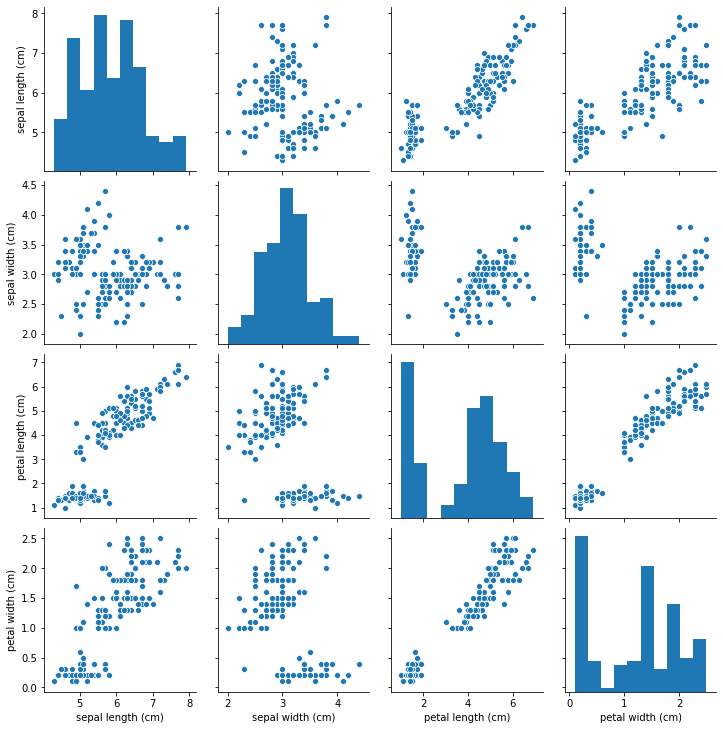

In [7]:
sns.pairplot(data=irisDframe)

## Função `test_30_knn`

Executa 30 rodadas com KNN, imprimindo o resultado da classificação e plotando a matriz de confusão.

Ao final, retorna 3 listas, contendo a **acurácia**, a **sensibilidade** e a **matriz de confusão** ao longo das 30 rodadas.

In [8]:
def test_30_knn(x, y, y_labels, k_vizinhos):
    # Armazena os resultados de acurácia, sensibilidade e matriz de confusão que ao final serão retornados
    irisAcc = []
    irisRec = []
    matrixProdada = []

    # Armazena as sementes já usadas para não haver repetição
    usedSeed = []

    for i in range(30):

        # Gerando inteiro aleatório para distribuição dos dados
        semente = randint(0, 8001)
        
        while semente in usedSeed:
            semente = randint(0, 8001)
        
        usedSeed.append(semente)

        # Separando dados para treino e teste
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=semente)

        # Instanciando classificador
        classifier = KNeighborsClassifier(n_neighbors=k_vizinhos)

        # Treinando modelo
        classifier.fit(X_train, y_train)

        # Realizando teste de classificação
        y_pred = classifier.predict(X_test)

        # Adicionando resultados à lista
        acc = accuracy_score(y_test, y_pred)
        irisAcc.append(acc)

        rec = recall_score(y_test, y_pred, average=None)
        irisRec.append(rec)

        # Exibindo resultados da rodada
        print(f"\n- RODADA {i} - Semente {semente} -\n")
        print("- Acurácia {accuracy} -\n- Sensibilidade {recall} -\n".format(accuracy=acc, recall=rec))

        print(classification_report(y_test, y_pred, target_names=y_labels))

        print("Matriz de confusão normalizada")
        matrixProdada.append(confusion_matrix(y_test, y_pred, normalize='true'))

        plot_confusion_matrix(
            estimator=classifier,
            X=X_test,
            y_true=y_test,
            display_labels=y_labels,
            cmap=plt.cm.Blues,
            normalize='true'
        )
        plt.show()
    return irisAcc, irisRec, matrixProdada

## Realizando 30 rodadas com 5 vizinhos


- RODADA 0 - Semente 843 -

- Acurácia 0.9333333333333333 -
- Sensibilidade [1.         0.76923077 1.        ] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.77      0.87        13
   virginica       0.82      1.00      0.90        14

    accuracy                           0.93        45
   macro avg       0.94      0.92      0.92        45
weighted avg       0.95      0.93      0.93        45

Matriz de confusão normalizada


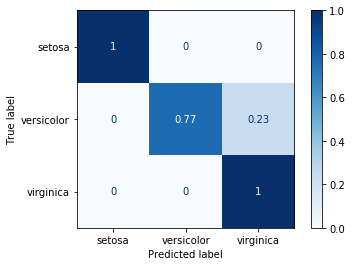


- RODADA 1 - Semente 3515 -

- Acurácia 0.9555555555555556 -
- Sensibilidade [1.         1.         0.88888889] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.87      1.00      0.93        13
   virginica       1.00      0.89      0.94        18

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Matriz de confusão normalizada


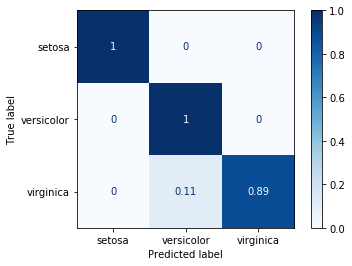


- RODADA 2 - Semente 5936 -

- Acurácia 0.9555555555555556 -
- Sensibilidade [1.         0.84615385 1.        ] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.85      0.92        13
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

Matriz de confusão normalizada


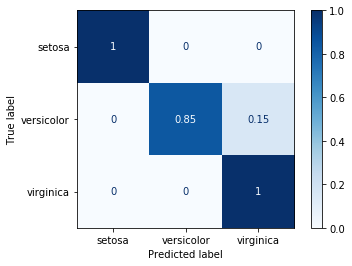


- RODADA 3 - Semente 1270 -

- Acurácia 0.9777777777777777 -
- Sensibilidade [1.         1.         0.94444444] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

Matriz de confusão normalizada


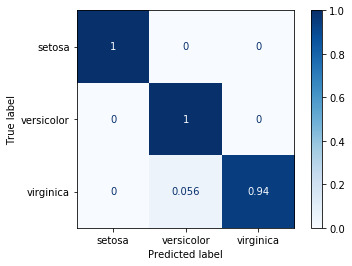


- RODADA 4 - Semente 460 -

- Acurácia 1.0 -
- Sensibilidade [1. 1. 1.] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      1.00      1.00        14
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Matriz de confusão normalizada


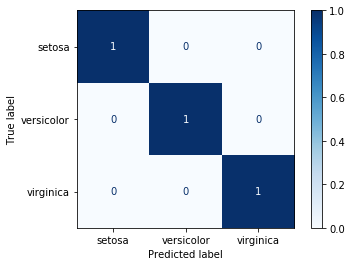


- RODADA 5 - Semente 5539 -

- Acurácia 0.9333333333333333 -
- Sensibilidade [1.         0.83333333 0.94736842] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.91      0.83      0.87        12
   virginica       0.90      0.95      0.92        19

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

Matriz de confusão normalizada


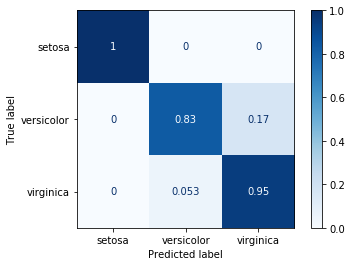


- RODADA 6 - Semente 7910 -

- Acurácia 1.0 -
- Sensibilidade [1. 1. 1.] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Matriz de confusão normalizada


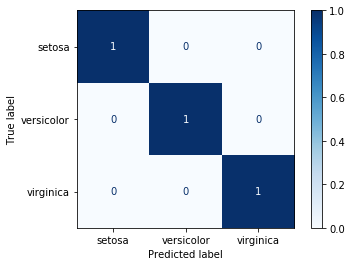


- RODADA 7 - Semente 1068 -

- Acurácia 0.9555555555555556 -
- Sensibilidade [1.         0.93333333 0.93333333] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.93      0.93        15
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Matriz de confusão normalizada


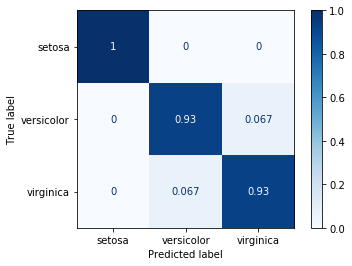


- RODADA 8 - Semente 6778 -

- Acurácia 0.9777777777777777 -
- Sensibilidade [1.         0.92857143 1.        ] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.93      0.96        14
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Matriz de confusão normalizada


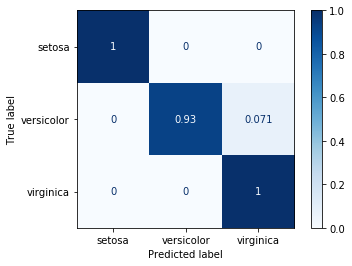


- RODADA 9 - Semente 3157 -

- Acurácia 1.0 -
- Sensibilidade [1. 1. 1.] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Matriz de confusão normalizada


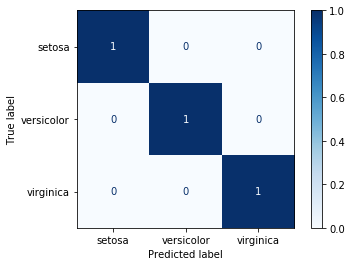


- RODADA 10 - Semente 5550 -

- Acurácia 0.9777777777777777 -
- Sensibilidade [1.     0.9375 1.    ] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.94      0.97        16
   virginica       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Matriz de confusão normalizada


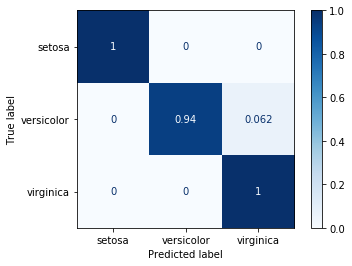


- RODADA 11 - Semente 7895 -

- Acurácia 0.9777777777777777 -
- Sensibilidade [1.         0.94444444 1.        ] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        18
   virginica       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Matriz de confusão normalizada


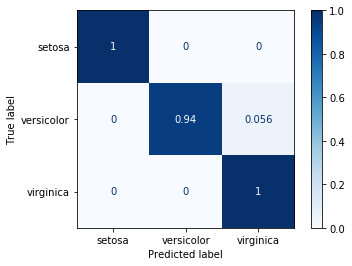


- RODADA 12 - Semente 1053 -

- Acurácia 0.9555555555555556 -
- Sensibilidade [1.         0.94117647 0.92307692] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      0.94      0.94        17
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

Matriz de confusão normalizada


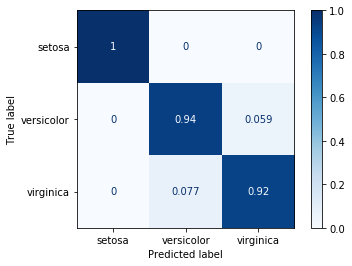


- RODADA 13 - Semente 3807 -

- Acurácia 0.9555555555555556 -
- Sensibilidade [1.         0.86666667 1.        ] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.87      0.93        15
   virginica       0.90      1.00      0.95        18

    accuracy                           0.96        45
   macro avg       0.97      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Matriz de confusão normalizada


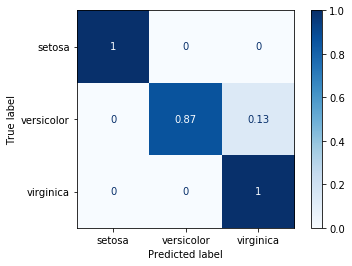


- RODADA 14 - Semente 1911 -

- Acurácia 0.9111111111111111 -
- Sensibilidade [1.         0.82352941 0.9375    ] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.93      0.82      0.87        17
   virginica       0.83      0.94      0.88        16

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.92      0.91      0.91        45

Matriz de confusão normalizada


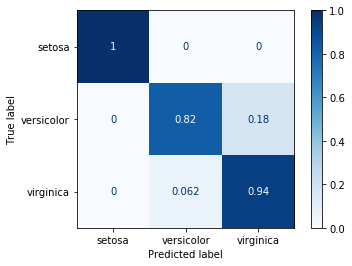


- RODADA 15 - Semente 7050 -

- Acurácia 0.9777777777777777 -
- Sensibilidade [1.         1.         0.92857143] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        16
   virginica       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Matriz de confusão normalizada


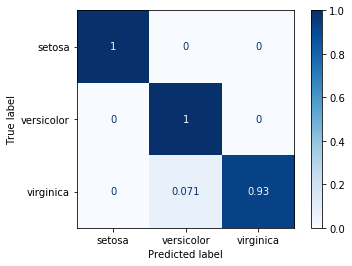


- RODADA 16 - Semente 716 -

- Acurácia 0.9333333333333333 -
- Sensibilidade [1.  1.  0.8] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.83      1.00      0.91        15
   virginica       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

Matriz de confusão normalizada


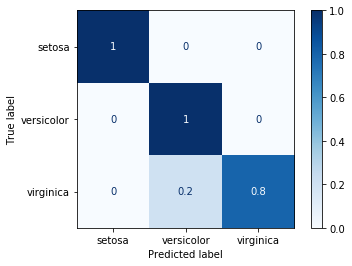


- RODADA 17 - Semente 5573 -

- Acurácia 0.9777777777777777 -
- Sensibilidade [1.     0.9375 1.    ] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        16
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Matriz de confusão normalizada


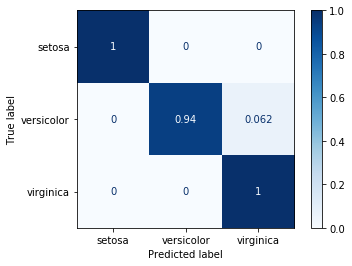


- RODADA 18 - Semente 5979 -

- Acurácia 0.9555555555555556 -
- Sensibilidade [1.         1.         0.88235294] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.89      1.00      0.94        17
   virginica       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Matriz de confusão normalizada


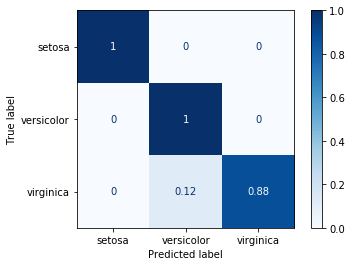


- RODADA 19 - Semente 3789 -

- Acurácia 0.9555555555555556 -
- Sensibilidade [1.         0.86666667 1.        ] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.87      0.93        15
   virginica       0.88      1.00      0.94        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Matriz de confusão normalizada


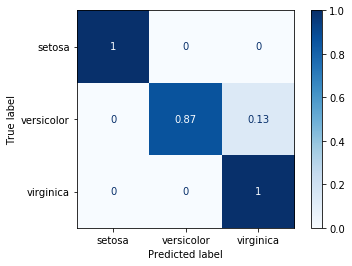


- RODADA 20 - Semente 7884 -

- Acurácia 0.9555555555555556 -
- Sensibilidade [1.    0.875 1.   ] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.88      0.93        16
   virginica       0.88      1.00      0.94        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Matriz de confusão normalizada


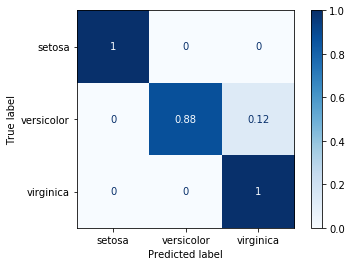


- RODADA 21 - Semente 3012 -

- Acurácia 0.9777777777777777 -
- Sensibilidade [1.         1.         0.93333333] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

Matriz de confusão normalizada


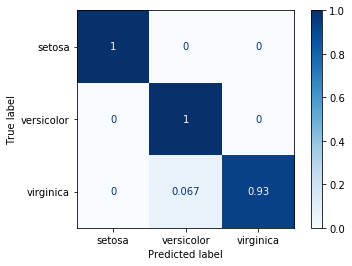


- RODADA 22 - Semente 2535 -

- Acurácia 0.9555555555555556 -
- Sensibilidade [1.         0.92307692 0.94444444] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.92      0.92      0.92        13
   virginica       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Matriz de confusão normalizada


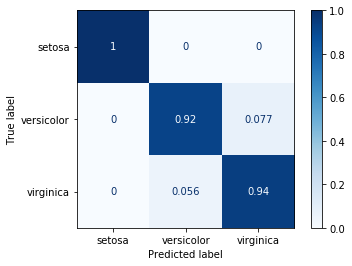


- RODADA 23 - Semente 1329 -

- Acurácia 0.9777777777777777 -
- Sensibilidade [1.         0.93333333 1.        ] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Matriz de confusão normalizada


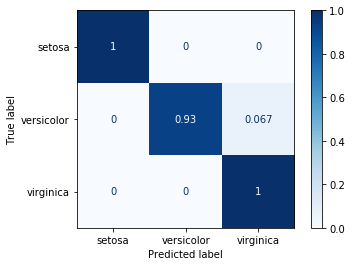


- RODADA 24 - Semente 1764 -

- Acurácia 0.9777777777777777 -
- Sensibilidade [1.         1.         0.94444444] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Matriz de confusão normalizada


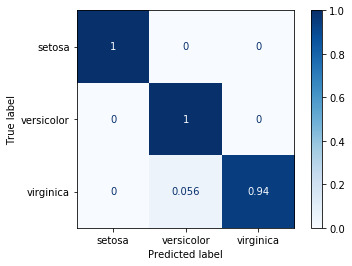


- RODADA 25 - Semente 1038 -

- Acurácia 0.9777777777777777 -
- Sensibilidade [1.         0.91666667 1.        ] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        12
   virginica       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Matriz de confusão normalizada


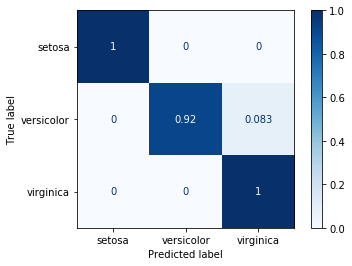


- RODADA 26 - Semente 7501 -

- Acurácia 0.9555555555555556 -
- Sensibilidade [1.    1.    0.875] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.85      1.00      0.92        11
   virginica       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

Matriz de confusão normalizada


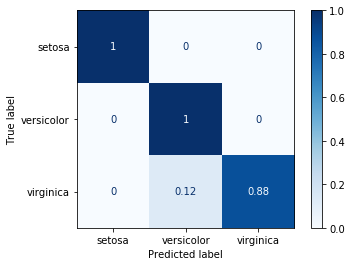


- RODADA 27 - Semente 791 -

- Acurácia 0.9777777777777777 -
- Sensibilidade [1.         0.91666667 1.        ] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.92      0.96        12
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Matriz de confusão normalizada


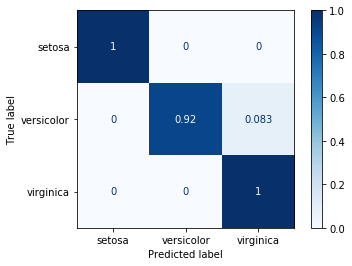


- RODADA 28 - Semente 6674 -

- Acurácia 0.9777777777777777 -
- Sensibilidade [1.     0.9375 1.    ] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Matriz de confusão normalizada


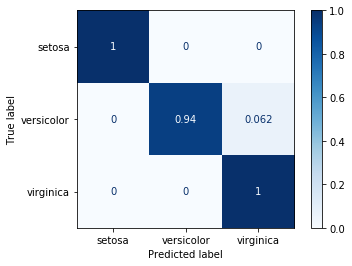


- RODADA 29 - Semente 7826 -

- Acurácia 0.9777777777777777 -
- Sensibilidade [1.         1.         0.94444444] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Matriz de confusão normalizada


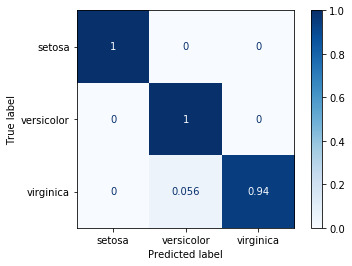

In [9]:
accuracy, recall, confusion = test_30_knn(x=irisData, y=irisTarget, y_labels=irisDset.target_names, k_vizinhos=5)

## Gerando _DataFrame_ de acurácia e sensibilidade

In [10]:
metricDF = pd.DataFrame(data=recall, columns=[f'S - {classe}' for classe in irisDset.target_names])
metricDF['Accuracy'] = accuracy
metricDF

,S - setosa,S - versicolor,S - virginica,Accuracy
0,1.0,0.769231,1.000000,0.933333
1,1.0,1.000000,0.888889,0.955556
2,1.0,0.846154,1.000000,0.955556
3,1.0,1.000000,0.944444,0.977778
4,1.0,1.000000,1.000000,1.000000
5,1.0,0.833333,0.947368,0.933333
6,1.0,1.000000,1.000000,1.000000
7,1.0,0.933333,0.933333,0.955556
8,1.0,0.928571,1.000000,0.977778
9,1.0,1.000000,1.000000,1.000000


In [11]:
metricDF.describe()

,S - setosa,S - versicolor,S - virginica,Accuracy
count,30.0,30.000000,30.000000,30.000000
mean,1.0,0.937678,0.960907,0.965926
std,0.0,0.065011,0.050819,0.020824
min,1.0,0.769231,0.800000,0.911111
25%,1.0,0.916667,0.934375,0.955556
50%,1.0,0.937500,1.000000,0.977778
75%,1.0,1.000000,1.000000,0.977778
max,1.0,1.000000,1.000000,1.000000


In [14]:
confusion

[array([[1.        , 0.        , 0.        ],
        [0.        , 0.76923077, 0.23076923],
        [0.        , 0.        , 1.        ]]),
 array([[1.        , 0.        , 0.        ],
        [0.        , 1.        , 0.        ],
        [0.        , 0.11111111, 0.88888889]]),
 array([[1.        , 0.        , 0.        ],
        [0.        , 0.84615385, 0.15384615],
        [0.        , 0.        , 1.        ]]),
 array([[1.        , 0.        , 0.        ],
        [0.        , 1.        , 0.        ],
        [0.        , 0.05555556, 0.94444444]]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 array([[1.        , 0.        , 0.        ],
        [0.        , 0.83333333, 0.16666667],
        [0.        , 0.05263158, 0.94736842]]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 array([[1.        , 0.        , 0.        ],
        [0.        , 0.93333333, 0.06666667],
        [0.        , 0.06666667, 0.93333333]]),
 array([[1.        , 0. 